# Landfill LCIA results

In [1]:
import swolfpy as sp
import swolfpy_inputdata as spid
import swolfpy_processmodels as sppm

import brightway2 as bw2
import matplotlib.pyplot as plt
import pandas as pd
from time import time
import os
import platform
from IPython.display import Image
pd.set_option('display.max_colwidth', 0)

### SwolfPy version used to produced the results:

In [2]:
pd.DataFrame({'Version': [sp.__version__, sppm.__version__, spid.__version__]},
             index=['swolfpy', 'swolfpy_processmodels', 'swolfpy_inputdata'])

,Version
swolfpy,0.2.3
swolfpy_processmodels,0.1.7
swolfpy_inputdata,0.2.2


## Create project

In [3]:
project_name = 'demo'
technosphere = sp.Technosphere(project_name)
common_data = spid.CommonData()
ProcessMetaData = sppm.ProcessModelsMetaData.ProcessModelsMetaData

In [4]:
# Treatment processes
Treatment_processes = {}
Treatment_processes['LF'] = {'input_type':ProcessMetaData['LF']['InputType'] , 'model':sppm.LF()}

In [5]:
# Distance
Processes = ['LF']
data = sppm.Distance.create_distance_table(process_names=Processes,
                                           transport_modes=['Heavy Duty Truck'],
                                           default_dist=30)

distance = sppm.Distance(data)          
data['Heavy Duty Truck']

,LF
LF,NaN


In [6]:
start = time()
demo = sp.Project(project_name, common_data, Treatment_processes, distance, None, technosphere)
demo.init_project()
demo.write_project()
demo.group_exchanges()
print("Time for writing the project: {} second".format(round(time()-start)))

Biosphere database already present!!! No setup is needed


Writing activities to SQLite3 database:



                ####
                ++++++  Writing the Technosphere
                


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:15


Title: Writing activities to SQLite3 database:
  Started: 11/24/2021 22:41:31
  Finished: 11/24/2021 22:41:47
  Total time elapsed: 00:00:15
  CPU %: 44.00
  Memory %: 1.33


Writing activities to SQLite3 database:



              ####
              ++++++ Initializing the LF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 11/24/2021 22:41:47
  Finished: 11/24/2021 22:41:47
  Total time elapsed: 00:00:00
  CPU %: 100.80
  Memory %: 1.34

              ####
              ++++++ Writing the LF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Title: Writing activities to SQLite3 database:
  Started: 11/24/2021 22:41:48
  Finished: 11/24/2021 22:41:49
  Total time elapsed: 00:00:01
  CPU %: 44.10
  Memory %: 1.36

                  Grouping the exchanges with parameters in Database LF
                  
Time for writing the project: 20 second


In [7]:
start = time()
newparam = []
demo.update_parameters(newparam)

print("Time for updating the parameters: {} second".format(round(time()-start)))

Time for updating the parameters: 0 second


## Create Scenario for Mixed Waste

In [8]:
input_dict = {'LF':{}}

for i,j in Treatment_processes['LF']['model'].process_data['Assumed_Comp'].items():
    input_dict['LF'][i] = j
demo.create_scenario(input_dict,'Residual_MSW')

## Setup LCA analysis and contribution analysis

In [9]:
func = []
for w in common_data.Index:
    func.append({('LF', w):1})

func.append({('waste', 'Residual_MSW'):1})
functioanl_units = func
impact_methods = [('IPCC 2013', 'climate change', 'GWP 100a'),('SwolfPy_Total_Cost', 'SwolfPy')]
lcis_res = sp.Project.setup_LCA('LF',functioanl_units,impact_methods)
lcis_res

,"('IPCC 2013', 'climate change', 'GWP 100a')","('SwolfPy_Total_Cost', 'SwolfPy')"
"('LF', 'Yard_Trimmings_Leaves')",-942.977719,14.305386
"('LF', 'Yard_Trimmings_Grass')",143.542409,15.486835
"('LF', 'Yard_Trimmings_Branches')",-634.781549,13.063652
"('LF', 'Food_Waste_Vegetable')",310.619866,15.896122
"('LF', 'Food_Waste_Non_Vegetable')",267.695255,21.579785
"('LF', 'Wood')",-1472.154253,13.959332
"('LF', 'Wood_Other')",-1377.489414,14.051989
"('LF', 'Textiles')",609.844282,2.683300
"('LF', 'Rubber_Leather')",-776.146969,14.378786
"('LF', 'Newsprint')",-1042.713003,13.578850


<AxesSubplot:>

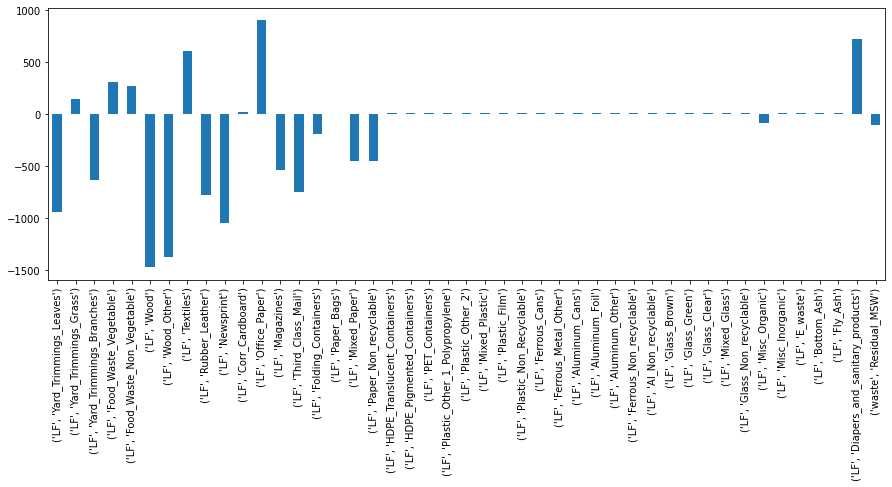

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
lcis_res.iloc[:, 0].plot.bar()

<AxesSubplot:>

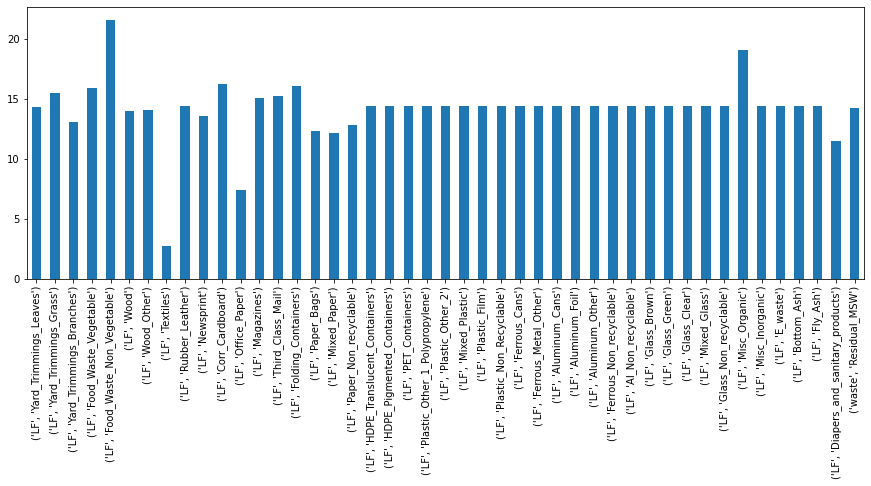

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
lcis_res.iloc[:, 1].plot.bar()